<img src="media/Cryo+ESA_logo_plain-50gray.svg" alt="CCI Cryosphere banner" width="1000"/>

# Permafrost
*Author Roelof Rietbroek, University of Twente, March 2021*

In this lesson, we encourage you to do a targeted search through the *Special Report on the Ocean and Cryosphere in a Changing Climate*. This report, produced by the United Nations' Intergovernmental Panel on Climate Change's (IPCC) in 2019, aims to inform the public and policy makers on the current state of scientific knowledge.


![Permafrost thawing in Siberia](media/imaggeo_permafrostSiberia.jpg)
*Thawing Permafrost in Siberia, Credit: Guido Grosse, distributed via [imaggeo.egu.eu](https://imaggeo.egu.eu/view/504/)*

There are high latitudes regions which have soil layers which are below 0 degrees Celsius for a multitude of years. These permafrost layers are made up of large amounts of organic matter and are therefore large carbon storages. Unfortunately, the warming climate causes these layers to thaw which consequently releases the carbon into the atmosphere as CO2 or CH4. Permafrost is an essential climate variable and interacts with the carbon cycle and, through the emission of greenhouse gasses, with the Earth's energy cycle. Since the permafrost layers are below the surface it is hard to directly measure the state of it from space, and additional physical information is used to derive variables such as permafrost layer temperature and depth from observations. 


# Cate Exercise: Visualize the Permafrost Active Layer depth as found on the CCI open data portal 

In [1]:
# To get things started we need to initialize a few things
#Load some python modules to make them accessible to the notebook
from cate.core.ds import DATA_STORE_REGISTRY
import cate.ops as ops
from cate.util.monitor import ConsoleMonitor

#temporary hack to work around (https://stackoverflow.com/questions/56154176/runtimeerror-asyncio-run-cannot-be-called-from-a-running-event-loop)
import nest_asyncio
nest_asyncio.apply()
# end temporary hack

monitor=ConsoleMonitor()

In [2]:
#initialize the online data store (In the background this class connects to the service at his connects to the site at https://catalogue.ceda.ac.uk)
data_store = DATA_STORE_REGISTRY.get_data_store('esa_cci_odp_os')

In [ ]:
# To get an idea of what is available in the online data portal one can query it and loop over it's result to print some information to the screen
permafqry=data_store.query(query_expr="permafrost")

for i,pfItem in enumerate(permafqry):
    print("\nDataset item %d:\nds_id: %s"%(i,pfItem.id))
    print(pfItem)

In [12]:
from datetime import datetime
# OK let's pick out a dataset:the Active layer thickness of the permafrost (bias corrected)
# The [0] at the end of the command means that we take the first item of the result list (we actually only expect one item)
pfalt=data_store.query("esacci.PERMAFROST.yr.L4.ALT.multi-sensor.multi-platform.ERA5_MODISLST_BIASCORRECTED.02-0.r1")[0]

#Open the dataset for use (this may take a while so we only take one year at this stage)
yr=2002
trange=[datetime(yr,1,1),datetime(yr,12,31)]
permaALTDset=pfalt.open_dataset(time_range=trange)

Text(0.5, 1.0, 'Permafrost active layer thickness in the Northern hemisphere')

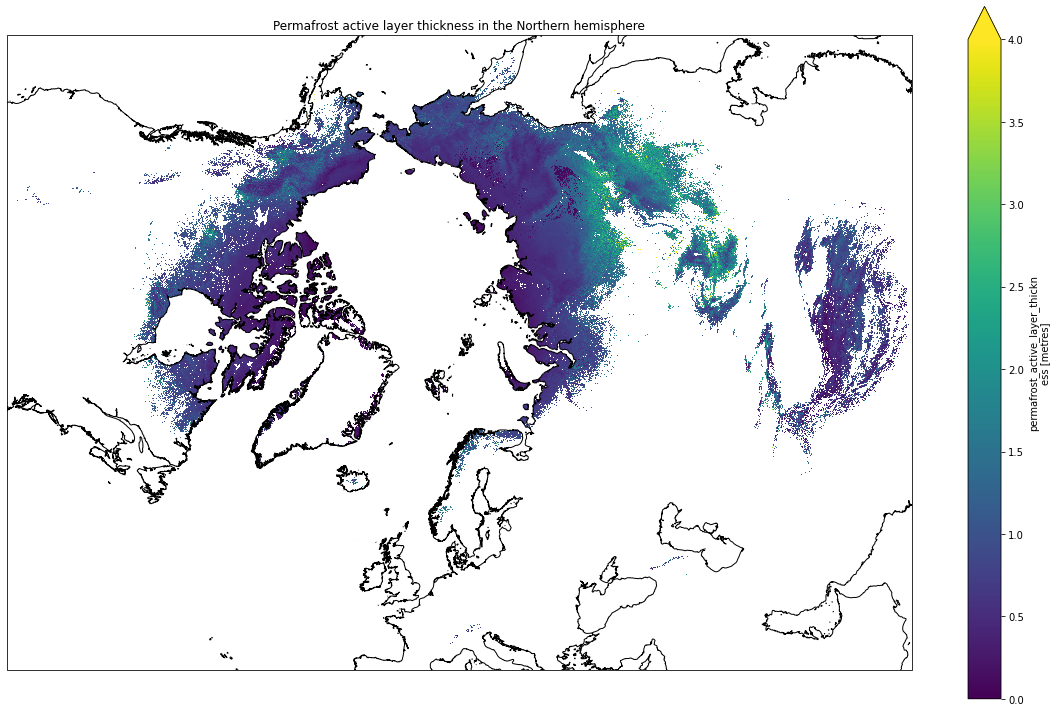

In [13]:
%matplotlib inline
import matplotlib.pyplot as mpl
import cartopy.crs as ccrs

mpl.figure(figsize=(16,10))
crs=ccrs.NorthPolarStereo(0,true_scale_latitude=71)

ax = mpl.subplot(projection=crs)
permaALTDset.ALT[0,:,:].plot.imshow(vmin=0,vmax=4,ax=ax)

ax.coastlines(resolution='10m')

ax.set_title("Permafrost active layer thickness in the Northern hemisphere")


So what does the science say? We invite you to step into the role of a policy maker and look in the [Special Report on the Ocean and Cryosphere in a Changing Climate](https://www.ipcc.ch/srocc/chapter/chapter-3-2/). Can you extract some core messages on permafrost from the report, without reading the entire thing? 

Here are some tips to help you get started. We encourage you to share your keywords and take-home messages on the discussion board:
1. Come up with a list of keywords to search for. "Permafrost" is obvious but there are many related terms which will get you to the relevant sections. You may considers downloading the pdf to facilitate searches
2. Try to come up with some questions which you would like to have answered, e.g.: How much carbon do the permafrost regions store?, How much have the permafrost regions declined?, What is expected to happen in the future? What is the primary driver for the decrease in permafrost?, How does permafrost affect the livelihoods of the people?,.. 
3. Extract 3 take-home messages on permafrost in a changing climate.